## Version Check

In [1]:
import pandas as pd
import numpy as np
import pickle
import sys
import sklearn
import imblearn
from sklearn import datasets, metrics, tree, model_selection, preprocessing
# print(pd.__version__)
# print(np.__version__)
# print(sys.version)
# print(sklearn.__version__)
# print(imblearn.__version__)
import os
os.environ["PATH"] += os.pathsep + 'C:/Graphviz/bin/'
import graphviz

In [2]:
## This section contains some initial code written, in order to "play"/get some results with explainable ML libraries. 
## However the model that is going to be used, derives from class_imbalance/cost_sensitive.ipynb
## Thus, the code used for initial results will be commented. The results from commented code will be left untouched.

In [3]:
# for plotting
import matplotlib.pyplot as plt

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [4]:
## Load Dataset
data = pd.read_csv('Datasets/creditcard.csv')
# rows and columns of the data
print(data.shape)

(284807, 31)


The NSL-KDD dataset contains 284807 rows, i.e., transactions, and 31 columns, i.e., variables. 

# SECTION 1: <br>THIS SECTION INCLUDES SOME INITIAL EXPERIMENTATIONS - MODEL BUILDING

## Check for Imbalanced Dataset

In [5]:
data['Class'].value_counts().to_frame().T

,0,1
Class,284315,492


In [6]:
from imblearn.over_sampling import SMOTE
from sklearn import model_selection, preprocessing
import sklearn.metrics as metrics

In [7]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [8]:
split = model_selection.StratifiedShuffleSplit(n_splits=1,
                                               test_size=0.4,
                                               random_state=0)
for train_index, test_index in split.split(X, y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [9]:
smote = SMOTE(random_state=0)
x_train, y_train = smote.fit_resample(x_train, y_train)

In [10]:
# SCALING
scaler = preprocessing.StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [11]:
# Checking that our dataset is balanced
from collections import Counter
print(Counter(y_train).keys())
print(Counter(y_train).values())

dict_keys([0, 1])
dict_values([170589, 170589])


## Build some models

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_validate
import time

In [13]:
# # start = time.time()
# # print(start)

# # rfc=RandomForestClassifier(random_state=42)

# # kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# param_grid = { 
#     'n_estimators': [200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }

# # grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=kfold)
# # grid_result = grid_search.fit(x_train_scaled, y_train)

# # print(f'Best: {grid_result.best_score_} using {grid_result.best_params_}','\n')
# # end = time.time()
# # print(end - start)

In [14]:
## GRID search was taking too long to run, so it was terminated. However since our goal was just to get an initial insight regarding the explainable ML libraries,
## we just used the best parameters from class_imbalance SMOTE section

In [15]:
#Set our final hyperparameters to the tuned values
# best_rfc = RandomForestClassifier(random_state=42,
#          n_estimators = grid_result.best_params_['n_estimators'],
#          max_features = grid_result.best_params_['max_features'],
#          max_depth = grid_result.best_params_['max_depth'],
#          criterion = grid_result.best_params_['criterion'])
best_rfc = RandomForestClassifier(random_state=0,
        n_estimators = 100,
        max_features = 'auto',
        max_depth = 5,
        criterion = 'gini')

# kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# #refit the model on k-folds to get stable avg error metrics
# scores = cross_validate(estimator=best_rfc, X=x_train_scaled, y=y_train, cv=kfold, n_jobs=-1, 
#                         scoring=['accuracy', 'roc_auc', 'precision', 'recall', 'f1'])

# print('Training 5-fold Cross Validation Results:\n')
# print('AUC: ', scores['test_roc_auc'].mean())
# print('Accuracy: ', scores['test_accuracy'].mean())
# print('Precision: ', scores['test_precision'].mean())
# print('Recall: ', scores['test_recall'].mean())
# print('F1: ', scores['test_f1'].mean(), '\n')

In [16]:
# #Fit the final model
best_rfc.fit(x_train_scaled, y_train)

RandomForestClassifier(max_depth=5, random_state=0)

Classification report (Test): 

              precision    recall  f1-score   support

           0       1.00      0.23      0.37    113726
           1       0.00      0.98      0.00       197

    accuracy                           0.23    113923
   macro avg       0.50      0.60      0.19    113923
weighted avg       1.00      0.23      0.37    113923

Confusion matrix (Test): 

[[2.27407986e-01 7.70862776e-01]
 [3.51114349e-05 1.69412673e-03]]

Train Accuracy: 0.9739959786387165
Test Accuracy: 0.22910211283059612

Train AUC: 0.995098360907481
Test AUC: 0.9364043206170749


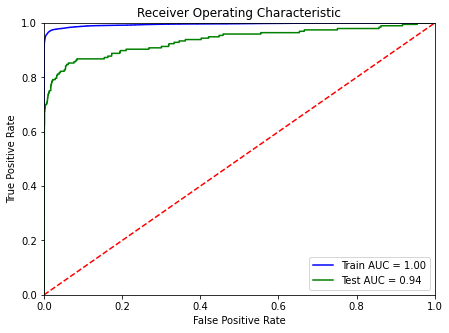

In [13]:
# #Generate predictions against our training and test data
# pred_train = best_rfc.predict(x_train_scaled)
# proba_train = best_rfc.predict_proba(x_train_scaled)
# pred_test = best_rfc.predict(x_test_scaled)
# proba_test = best_rfc.predict_proba(x_test_scaled)

# # Print model report
# print("Classification report (Test): \n")
# print(metrics.classification_report(y_test, pred_test))
# print("Confusion matrix (Test): \n")
# print(metrics.confusion_matrix(y_test, pred_test)/len(y_test))

# print ('\nTrain Accuracy:', metrics.accuracy_score(y_train, pred_train))
# print ('Test Accuracy:', metrics.accuracy_score(y_test, pred_test))

# print ('\nTrain AUC:', metrics.roc_auc_score(y_train, proba_train[:,1]))
# print ('Test AUC:', metrics.roc_auc_score(y_test, proba_test[:,1]))

# # calculate the fpr and tpr for all thresholds of the classification
# train_fpr, train_tpr, train_threshold = metrics.roc_curve(y_train, proba_train[:,1])
# test_fpr, test_tpr, test_threshold = metrics.roc_curve(y_test, proba_test[:,1])

# train_roc_auc = metrics.auc(train_fpr, train_tpr)
# test_roc_auc = metrics.auc(test_fpr, test_tpr)

# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=[7,5])
# plt.title('Receiver Operating Characteristic')
# plt.plot(train_fpr, train_tpr, 'b', label = 'Train AUC = %0.2f' % train_roc_auc)
# plt.plot(test_fpr, test_tpr, 'g', label = 'Test AUC = %0.2f' % test_roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

# END OF SECTION 1

# SECTION 2: <br> In this section we used the optimal parameters from class_imbalance.ipynb SMOTE-section (cell 13), with one small change: We set max_depth to 5 instead of 21 for visualization purposes

## Section 2a: feature importance

In [17]:
features = [col for col in data.columns if col!='Class']

In [18]:
importances = best_rfc.feature_importances_

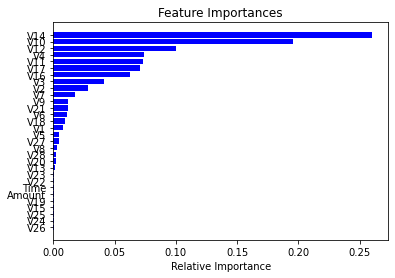

In [19]:
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## GRAPHVIZ

In [20]:
class_names = ['normal', 'fraud']

In [21]:
class_names

['normal', 'fraud']

In [22]:
dot_data = tree.export_graphviz(best_rfc.estimators_[5],
                  feature_names=features,
                  class_names=class_names,
                  filled=True, rounded=True,
                  special_characters=True,
                  out_file=None)

In [22]:
graph = graphviz.Source(dot_data)
graph.render("graphviz")

'graphviz.pdf'

## SHAP

In [23]:
import shap

In [24]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [25]:
split = model_selection.StratifiedShuffleSplit(n_splits=1,
                                               test_size=0.4,
                                               random_state=0)
for train_index, test_index in split.split(X, y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [26]:
scaler = preprocessing.StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [27]:
smote = SMOTE(k_neighbors=7, random_state=0)
X_smote, y_smote = smote.fit_resample(x_train_scaled, y_train)

In [28]:
columns = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
my_dic = {}
for idx, name in enumerate(columns):
    my_dic[name] = X_smote[:, idx]

In [29]:
scaled_data = pd.DataFrame(my_dic)

In [30]:
#take a random row of data
import random
X_rand = scaled_data.sample(1, random_state = 0)
display(data.iloc[X_rand.index])

#generate a prediction for the row
rand_pred = best_rfc.predict(X_rand.values)
rand_proba = best_rfc.predict_proba(X_rand.values)

print(f'Predicted Probability (no, yes): {rand_proba}')
print(f'Predicted Fraud (0 = no, 1 = yes): {rand_pred}','\n')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
246321,153127.0,2.038039,-0.113168,-1.344329,0.380816,-0.097263,-1.30102,0.20352,-0.335341,0.72456,0.025939,-0.791613,-0.141523,-0.800585,0.668531,0.884478,-0.232892,-0.396705,-0.045064,-0.302168,-0.279612,0.249316,0.821445,0.004929,0.001162,0.218901,-0.104077,-0.024658,-0.058671,15.27,0


Predicted Probability (no, yes): [[0.031629 0.968371]]
Predicted Fraud (0 = no, 1 = yes): [1] 



In [31]:
explainer = shap.TreeExplainer(best_rfc, model_output='probability', feature_dependence='interventional', data=scaled_data)
shap_values = explainer.shap_values(scaled_data.iloc[X_rand.index])
shap.initjs()
display(shap.force_plot(explainer.expected_value[1], shap_values[1], scaled_data.iloc[X_rand.index]))

## SHAP SUMMARY PLOT

100%|===================| 227759/227846 [11:04<00:00]        

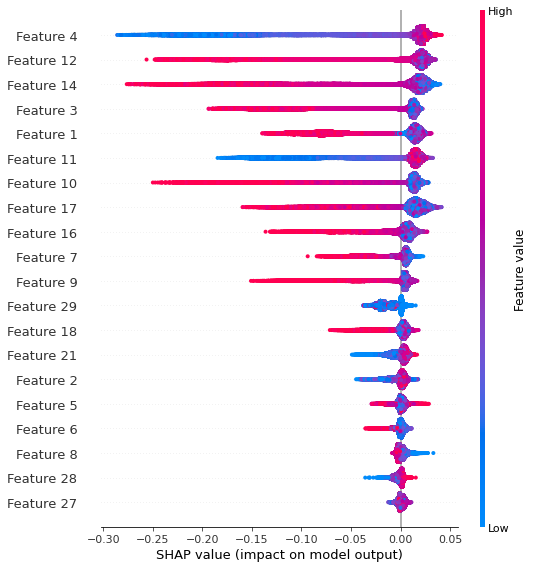

In [38]:
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values[1], x_test)

## SHAP Dependence contribution plots

100%|===================| 682047/682356 [27:05<00:00]        

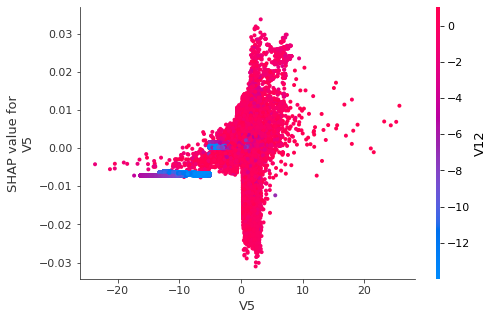

In [41]:
shap_values = explainer.shap_values(scaled_data)
shap.dependence_plot('V5', shap_values[1], scaled_data, interaction_index='V12')

100%|===================| 682045/682356 [27:33<00:00]        

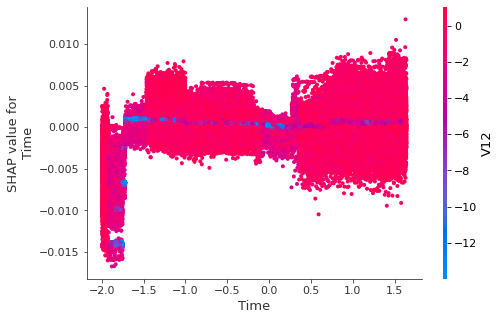

In [42]:
shap_values = explainer.shap_values(scaled_data)
shap.dependence_plot('Time', shap_values[1], scaled_data, interaction_index='V12')

100%|===================| 682009/682356 [26:49<00:00]        

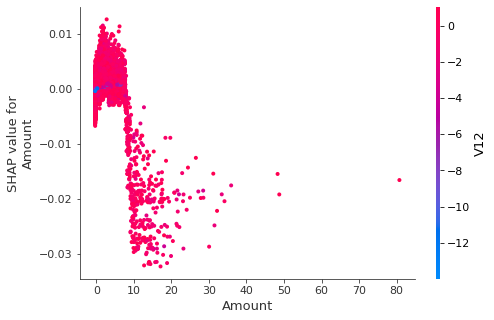

In [43]:
shap_values = explainer.shap_values(scaled_data)
shap.dependence_plot('Amount', shap_values[1], scaled_data, interaction_index='V12')

100%|===================| 682144/682356 [26:38<00:00]        

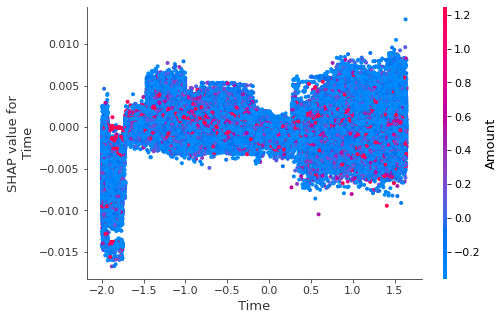

In [44]:
shap_values = explainer.shap_values(scaled_data)
shap.dependence_plot('Time', shap_values[1], scaled_data, interaction_index='Amount')

## PERMUTATION IMPORTANCE

In [45]:
import eli5
from eli5.sklearn import PermutationImportance

In [46]:
perm = PermutationImportance(best_rfc, random_state=1).fit(x_test_scaled, y_test)
eli5.show_weights(perm, feature_names = columns)

Weight,Feature
0.0123 ± 0.0007,V10
0.0073 ± 0.0005,V9
0.0069 ± 0.0006,V4
0.0059 ± 0.0007,V1
0.0042 ± 0.0008,V18
0.0028 ± 0.0007,V28
0.0013 ± 0.0006,V8
0.0013 ± 0.0006,V2
0.0013 ± 0.0001,V21
0.0007 ± 0.0001,V22


In [47]:
from eli5 import show_prediction
show_prediction(best_rfc, X_rand, feature_names=columns, show_feature_values=True)